# Tree decomposition

A *tree decomposition* of a (connected) graph $G$ is a tree $T$, vertices of $T$ are called _bags_ which are sets of vertices of $G$:
1. each vertex $v$ of the graph $G$ is contained in a vertex (bag) of $T$,
2. for each edge $uv$ of the graph $G$, there is a vertex (bag) of $T$ that contains both $u$ and $v$,
3. for each vertex $v$ of $G$, the set of vertices of $T$ which contain $v$ induce a connected subtree.

## Exercises

### 1. Bucket elimination

Bucket elimination is a heuristic algorithm for finding a tree decomposition for a graph $G$.

Order the vertices of $G$ by non-increasing degree
1. for each vertex $v \in V(G)$ add a vertex to $T$ with the initial bag $B(v)$ containing $v$,
2. for each edge $uv \in E(G)$ add the "left" vertex to the bag of the "right" vertex,
3. From right to left process the vertices $v$:
   1. let $A$ be the bag $B(v) \setminus \{v\}$,
   2. let $u$ be the rigthmost vertex in $A$,
   3. add $A$ to the bag $B(u)$ and add  edge $uv$ to the tree.

Write a function `decomposition_width(B)` which returns the width of the tree decomposition `B`, `B` is a bucket map returned by the `bucket_elimination` algorithm which is already implemented below. Compare with the value returned by the Sage function `treewidth()`.

### 2. Nice tree decomposition

A *nice tree decomposition* is a rooted binary tree decomposition with four kinds of tree vertices:
1. **start**: leaves have bags of size 1,
2. **introduce**: a vertex $v$ with one child $u$, the bag of $u$ contains one element less than the bag of $v$,
3. **forget**:  a vertex $v$ with one child $u$, the bag of $u$ contains one element more than the bag of $v$,
4. **join**: a vertex $v$ with two children, both have the same bag as $v$.

Write function `nice_tree_decomposition(G, T, B)` which transforms the tree decomposition `T, B` of the graph `G` into a "nice tree decomposition".

In [79]:
def bucket_elimination(G):
    # Initialize a new graph object to represent the elimination tree
    T = Graph()  # or T = DiGraph() if it's directed
    # Initialize a dictionary to map vertices to their respective buckets
    B = {v: {v} for v in G.vertices()}

    # Order vertices by decreasing degree
    vertices_sorted = sorted(G.vertices(), key=lambda v: G.degree(v), reverse=True)
    dict_order = {v: i for i, v in enumerate(vertices_sorted)}

    # Add vertices to the tree T
    for vertex in vertices_sorted:
        T.add_vertex(vertex)

    # Add edges to the buckets
    for u, v in G.edges(labels=False):
        if dict_order[u] < dict_order[v]:
            # u comes before v in the order
            B[v].add(u)
        else:
            B[u].add(v)

    # Process vertices in reverse order
    for vertex in reversed(vertices_sorted):
        # A is the set of neighbors of vertex, excluding the vertex itself
        A = B[vertex] - {vertex}
        # Find the last vertex in the order that is a neighbor
        u = max(A, key=lambda x: dict_order[x], default=None)
        if u is not None:
            # Add A to the bucket of u and connect u and vertex
            B[u].update(A)
            T.add_edge(vertex, u)

    return T, B


In [84]:
def decomposition_width(B):
    return max(len(bucket) for bucket in B.values()) - 1

## Tests

### Decomposition width

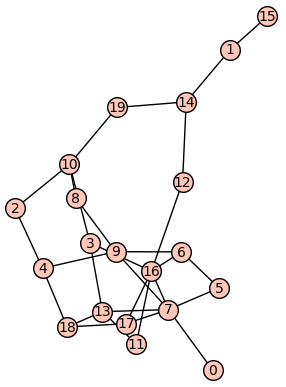

In [67]:
G = Graph('S?G?KG?Ax`????CPG?Q??Cp_@?GOAG?P?')
G.show()

In [80]:
T, B = bucket_elimination(G)

The tree is:

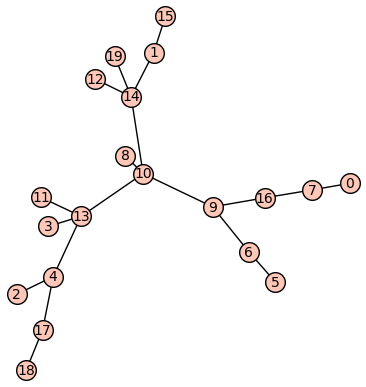

In [81]:
T.plot()

Buckets, for each tree vertex, are:

In [82]:
B == {7: {7},
 16: {7, 16},
 9: {7, 9, 16},
 10: {7, 9, 10, 16},
 13: {7, 9, 10, 13, 16},
 3: {3, 10, 13, 16},
 4: {4, 7, 9, 10, 13, 16},
 6: {6, 7, 9, 16},
 14: {10, 14, 16},
 17: {4, 7, 13, 16, 17},
 18: {4, 13, 17, 18},
 1: {1, 14},
 2: {2, 4, 10},
 5: {5, 6, 7},
 8: {8, 9, 10},
 11: {11, 13, 16},
 12: {12, 14, 16},
 19: {10, 14, 19},
 0: {0, 7},
 15: {1, 15}}

True

Should be 5, the size of the largest bucket - 1

In [85]:
decomposition_width(B)

5

Rename vertices of T such that they correspond to buckets 

In [86]:
def relabel_tree_decomposition(T, B):
    T = T.copy()
    T.relabel({k: tuple(S) for k, S in B.items()})
    return T

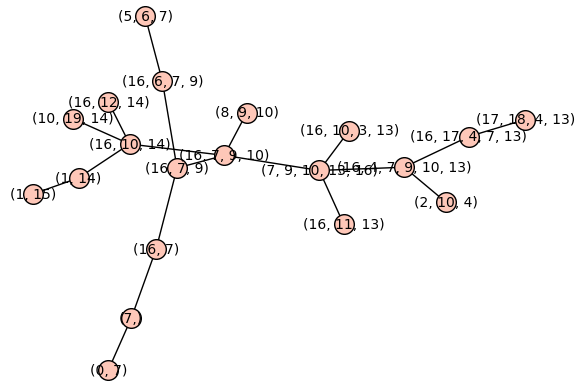

In [87]:
relabel_tree_decomposition(T, B).plot()

Compare to the built-in function returning tree width (should get less or equal than by `decomposition_width`)

In [88]:
G.treewidth()

4

In [90]:
G1 = graphs.RandomGNP(15, 0.4)
T1, B1 = bucket_elimination(G1)
decomposition_width(B1)

9

This can be slow, since it is optimal and NP-complete!

In [91]:
G1.treewidth()

7

In [92]:
def is_tree_decomposition(G, T, B):
    bags = list(B.values())
    for v in G.vertices(sort=False):
        has_bag = False
        for b in bags:
            if v in b:
                has_bag = True
                break
        if not has_bag:
            return False
    for u, v in G.edges(labels=False, sort=False):
        has_bag = False
        for b in bags:
            if v in b and u in b:
                has_bag = True
                break
        if not has_bag:
            return False
    for v in G.vertices(sort=False):
        tverts = []
        for tv, b in B.items():
            if v in b:
                tverts.append(tv)
        TS = T.subgraph(tverts)
        if not TS.is_connected():
            return False
    return True
        

In [93]:
is_tree_decomposition(G, T, B)

True

In [94]:
is_tree_decomposition(G1, T1, B1)

True

### Nice tree decomposition

In [95]:
def DDFS(T, r):
    """Directs the tree T to the root r."""
    active = [r]
    prev = {}
    while len(active) > 0:
        v = active.pop()
        for w in T.neighbors(v):
            if w not in prev and w not in active and w != r:
                prev[w] = v
                active.append(w)
    DT = DiGraph()
    DT.add_edges(prev.items())
    return DT

In [ ]:
def nice_tree_decomposition(T, B):
    T = T.copy()
    B = dict((v, copy(b)) for (v, b) in B.items())
    ntd_handle_leaves(T, B)
    ntd_handle_edges(T, B)
    r = T.vertices(sort=False)[0]
    DT = DDFS(T, r)
    ntd_handle_multiple_children(DT, B)
    return DT, B

def ntd_handle_leaves(T, B):
    for v in T.vertices():
        if T.degree(v) == 1:
            # Leaf node
            leaf_node = v
            leaf_bag = B[leaf_node]
            while len(leaf_bag) > 1:
                leaf_bag = leaf_bag.copy()
                leaf_bag.pop()
                # Create a new leaf node 
                new_leaf_node = T.add_vertex()
                # Add an edge from the new leaf node to the original leaf node
                T.add_edge(new_leaf_node, leaf_node)
                # Update the bucket for the new leaf node
                B[new_leaf_node] = leaf_bag
                leaf_node = new_leaf_node
            
def ntd_handle_edges(T, B):
    for edge in T.edges():
        u, v = edge[0], edge[1]
        b_u = B[u]
        b_v = B[v]
        
def ntd_handle_multiple_children(DT, B):
    pass

In [ ]:
NT, NB = nice_tree_decomposition(T, B)

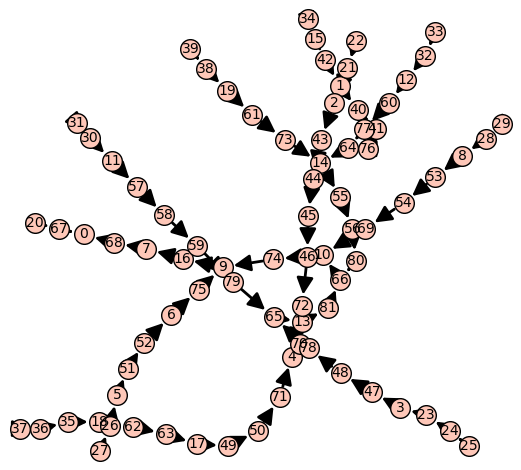

In [ ]:
NT.plot()

In [ ]:
def is_nice_tree_decomposition(G, T, B):
    if not is_tree_decomposition(G, T, B):
        return False
    for v in T.vertices(sort=False):
        nin = NT.neighbors_in(v)
        if len(nin) == 0: # leaf
            if len(B[v]) != 1:
                print(f"leaf {v} has bag of size {len(B[v])}")
                return False
        elif len(nin) > 2: 
            print(f"vertex {v} has 3 or more children")
        elif len(nin) == 1:
            u = nin[0]
            ints = B[v] & B[u]
            if len(B[v] - ints) > 1 or len(B[u] - ints) > 1:
                print(f"verices {v} and {u} have bags {B[v]} and {B[u]} with difference > 1")
        # len(nin) == 2
        elif B[v] != B[nin[0]] or B[v] != B[nin[1]]:
            print(f"children of {v} have different bags")
            return False
    return True

In [ ]:
is_nice_tree_decomposition(G, NT, NB)

True

Graph on 20 vertices (use the .plot() method to plot)